# Download Copernicus data - read, manipulate and visualize netcdf files
Climate datasets are available on the CDS store at https://cds.climate.copernicus.eu/datasets
To access and download climate data from the Copernicus data store a user must
1) Create an ECMWF account - click on the Log-in / register button (top right icon on the CDS website)
2) Install the cds api and create a .cdsapirc file in their $HOME directory (usually /home/username/.cdsapirc on Linux/MacOS or %USERPROFILE%\.cdsapirc e.g. C:\Users\Username folder for Windows users). The .cdsapirc file contains two lines, the URL of the CDS and a crypted key to access the data. Detailed instructions and examples are available at https://cds.climate.copernicus.eu/how-to-api
3) Send a request using the CDS api in Python to retrieve netcdf (or grib) files

This example focuses on Jupyter notebook/Python there are packages in R to use the same API - details are available at https://bluegreen-labs.github.io/ecmwfr/

In [ ]:
####################################################################################
# Install required packages automatically if not already installed on the system
####################################################################################
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install cdsapi
!{sys.executable} -m pip install netCDF4
!{sys.executable} -m pip install cartopy
!{sys.executable} -m pip install xarray
!{sys.executable} -m pip install datetime

### The following script is required to operate the CDS API

Please paste your URL and KEY below to acquire access to the Climate Data Store.

To open an account or obtain a key, please follow instructions at [Climate Data Store](https://cds.climate.copernicus.eu/)

*Please note that the following will **replace** any existing key if you run it outside this Container!*

In [ ]:
import os

url = ""
key = ""

os.system("echo %s > ~/.cdsapirc" %url)
os.system("echo %s >> ~/.cdsapirc" %key)

In [ ]:
##############################
# Import required packages
##############################
import cdsapi
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import xarray as xr
import datetime
from calendar import monthrange
from datetime import datetime
from datetime import timedelta

## 1) Use website to copy API request directly into Jupyter notebook
Climate datasets are available on the CDS store at https://cds.climate.copernicus.eu/datasets
User guide and information about the CDS are available at https://cds.climate.copernicus.eu/user-guide

For the first example, we will use the CDS website to copy and paste the request directly
1) In the search bar type "ERA5 daily"
2) Select "ERA5 post-processed daily statistics on single levels from 1940 to present" [https://cds.climate.copernicus.eu/datasets/derived-era5-single-levels-daily-statistics?tab=overview]
3) 3 Tabs are available: (i) "Overview" provides details about the dataset (ii) "Download" allows to select variables and download the data and (iii) "Documentation" provides links to related scientifc publications and technical reports
4) Click on the Download Tab
5) Tick the boxes "2m temperature", "2025", ", July and August", "Day -> Select all", "Frequency 1-hourly"
6) In "Terms of use" the user needs to accept the lience agreement (to do once for a particular dataset)
7) The data can then be downloaded directly using a browser by pressing the "Submit Form" button, but we will use the API in the following example
8) Under API request click on "Show API request code". This piece of code needs to be copied in the box below. Note that we already imported the cdsapi package earlier ("import cdsapi") and we mofied the output file name and directory (last line of the code below)

In [3]:
# Define output directory and file name
outdir = "Data"
outfile = "example1_ERA5.nc" # Name of the output netcdf file

# Create output directory if it does not exist
if not os.path.exists(outdir):
    os.mkdir(outdir)
outfile = outdir + "/" + outfile 

#############################################################################
# Copy and paste request from website below (1st example is provided below)
#############################################################################

dataset = "derived-era5-single-levels-daily-statistics"
request = {
    "product_type": "reanalysis",
    "variable": ["2m_temperature"],
    "year": "2025",
    "month": ["07", "08"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "daily_statistic": "daily_mean",
    "time_zone": "utc+00:00",
    "frequency": "1_hourly"
}

client = cdsapi.Client()
client.retrieve(dataset, request).download(outfile) # we added an output file name that will be saved in outdir

2025-09-13 15:19:18,959 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:19:19,507 INFO Request ID is 22d8e741-055f-4ffb-98b7-b29663d292c8
2025-09-13 15:19:19,708 INFO status has been updated to accepted
2025-09-13 15:19:33,521 INFO status has been updated to running
2025-09-13 15:19:53,224 INFO status has been updated to successful


38bfcbcec513a353d3116f020d809548.nc:   0%|          | 0.00/141M [00:00<?, ?B/s]

'Data/example1_ERA5.nc'

## Read and manipulate the example file
We have now downloaded global daily temperature data based on the ERA5 dataset for July-August 2025.
The output file (Data/example1_ERA5.nc) is in netcdf format (*.nc) and contains gridded temperature data and the associated metadata.
We will first read the netcdf file directly into Python and print some information about the variables, dimensions and attributes


In [4]:
#######################################################################################
# Read climate data file (previously defined as outfile) and print basic information
#######################################################################################

ds = nc.Dataset(outfile)

# Print some information about the netcdf file
print(ds) 

# The former command probides information about the file format - variables - their dimensions and metadata
# Temperature is a 3D variable t2m(valid_time, latitude, longitude)
# Time has 62 points valid_time(62) for July-August 2025, and the related latitude(721), longitude(1440) have 721 and 1440 data points

# Metadata can also be accessed using a catalogue/dictionnary
print(ds.__dict__)

# More information about the temperature variable
print(ds['t2m']) # Temperature is in Kelvin hand the 3D temperature array (ntime=62, nlat=721, nlon=1440)
print(ds['latitude']) # lat in degrees
print(ds['longitude']) # Lon in degrees
print(ds['valid_time']) # Time

# We can also print the latitude and longitude numerical values below 
# standard resolution from our former API request is 0.25deg for both lat and Lon
print(ds['latitude'][:])
print(ds['longitude'][:])


<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2025-09-10T12:53 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.42.0 with {"source": "2m_temperature.grib", "filter_by_keys": {"stream": ["oper"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
earthkit.transforms.aggregate.temporal.daily_reduce(2m_temperature_stream-oper, how=mean, **{'time_shift': {'hours': 0}})
    dimensions(sizes): valid_time(62), latitude(721), longitude(1440)
    variables(dimensions): float32 t2m(valid_time, latitude, longitude), int64 number(), float64 latitude(latitude), float64 longitude(longitude), int64 valid_time(valid_time)
    groups: 
{'GRIB_centre': 'ecmf', 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts', 'GR

## Plot a map to visualize the data

<xarray.Dataset> Size: 258MB
Dimensions:     (valid_time: 62, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * valid_time  (valid_time) datetime64[ns] 496B 2025-07-01 ... 2025-08-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 257MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-10T12:53 GRIB to CDM+CF via cfgrib-0.9.1...


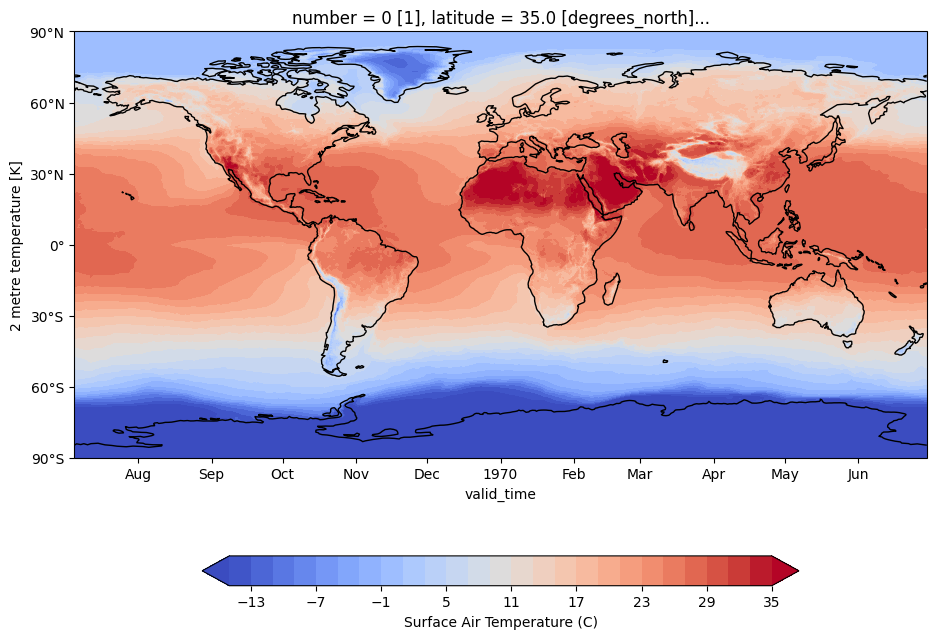

In [5]:
##########################################################################
# Plot a map - averaging over the time dimension
##########################################################################

# xarray can also be used to read nc files and print file info
dset = xr.open_dataset(outfile)
print(dset)

# Calculate average on the time dimension
ds_mean=dset.mean(dim='valid_time') 
ds_mean = ds_mean -273.15

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

levels = np.linspace(-15, 35, 26)
# Make a filled contour plot
cs=ax.contourf(dset['longitude'], dset['latitude'], ds_mean['t2m'],
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both',levels = levels)

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (C)')

##########################################################################
# Plot time series for a selected location (Larnaca)
##########################################################################

latsel = 34.9
lonsel = 33.6  # Larnaca

# Extract a dataset closest to specified point
dsloc = dset.sel(longitude=lonsel, latitude=latsel, method='nearest')

# select a variable to plot
dsloc['t2m'].plot()


## Plot a time series for a given location

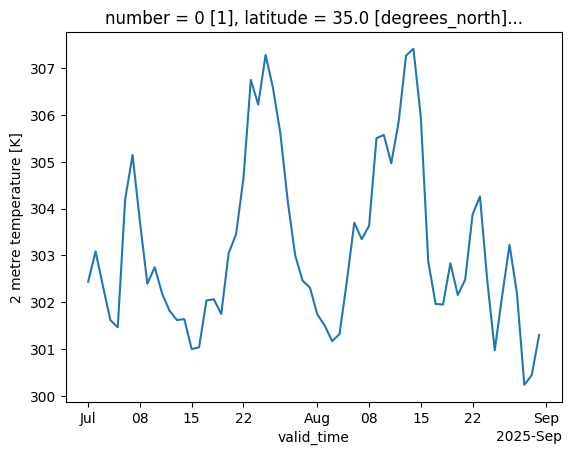

In [6]:
##########################################################################
# Plot time series for a selected location
##########################################################################

latsel = 34.9
lonsel = 33.6  # Larnaca

# Extract a dataset closest to specified point
dsloc = dset.sel(longitude=lonsel, latitude=latsel, method='nearest')

# select a variable to plot
dsloc['t2m'].plot()

## 2) Use a function to automate the download of files for a particular region & time function
The following example will now be based on a generic function to retrieve ERA5 rainfall and temperature data from the CDS and create a single rainfall and temperature file for Cyprus. Note that there are several variables and option to send an API request to the CDS. More details for ERA5 daily data can be found at https://confluence.ecmwf.int/display/CKB/ERA5+family+post-processed+daily+statistics+documentation


In [7]:
def download_era5_data(varlist, latmin, latmax, lonmin, lonmax, year_start, year_end, gridres, outdir):

# Output directory = input climate data
    if not(os.path.isfile(outdir)):
        os.system("mkdir -p "+outdir)

    years_vector = np.arange(year_start, year_end+1, 1)
    years = [str(years_vector) for years_vector in years_vector]
    yearnow   = datetime.now().year
    monthnow  = datetime.now().month

########################################################
    
    dataset = "derived-era5-single-levels-daily-statistics"
    for var in varlist:
        for yr in years:
            if yr == str(yearnow):
                nmonth = monthnow - 1
            else:
                nmonth = 12
        months_vector = np.arange(1, nmonth +1 , 1)
        months = [f"{months_vector:02}" for months_vector in months_vector]
        
        for mn in months:
            outfile = var+"_1d_"+yr+"_"+mn+"_ERA5.nc"
            outfile = outdir + "/" +outfile  
            ndays = monthrange(int(yr), int(mn))[1]
            days_vector = np.arange(1, ndays+1, 1)
            days = [f"{days_vector:02}" for days_vector in days_vector]
            request = {
                'product_type': ['reanalysis'],
                'variable': var,
                'year': yr,
                'month': mn,
                'day': days,
                'data_format': 'netcdf',
                'grid': gridres,
                'area': [latmax, lonmin, latmin, lonmax],
                "daily_statistic": "daily_mean",
                "time_zone": "utc+00:00",
                "frequency": "1_hourly"
            }
            if not(os.path.isfile(outfile)):
                client = cdsapi.Client()
                client.retrieve(dataset, request, outfile)

In [8]:
########################################################
# Next block calls the function we defined earlier
#########################################################

#varlist   = ["2m_temperature", "total_precipitation"] # variables (temperature and rainfall)
varlist   = ["total_precipitation"] # variables (rainfall only)

# Define domain (Cyprus)
latmin = 34.5
latmax = 35.75
lonmin = 32.25
lonmax = 34.75

# Define start year for ERA5 data - test for 2024
year_start = 2024
year_end   = 2024

# Spatial resolution of ERA5 data 0.25, 0.5 or 1 deg res
gridres = "0.25/0.25"

# Call the former function to automate the data download process
download_era5_data(varlist, latmin, latmax, lonmin, lonmax, year_start, year_end, gridres, outdir)


2025-09-13 15:21:34,481 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:21:35,970 INFO Request ID is 7da690be-9013-40d2-a9ab-81ea88954e72
2025-09-13 15:21:36,040 INFO status has been updated to accepted
2025-09-13 15:21:49,756 INFO status has been updated to running
2025-09-13 15:21:57,430 INFO status has been updated to successful


2cb20c1702d103dd05a9aa255931703f.nc:   0%|          | 0.00/27.6k [00:00<?, ?B/s]

2025-09-13 15:21:59,534 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:22:00,147 INFO Request ID is 1bc2cd1f-2a07-4c49-b2b3-4ee77f9374c6
2025-09-13 15:22:00,196 INFO status has been updated to accepted
2025-09-13 15:22:08,639 INFO status has been updated to running
2025-09-13 15:22:14,181 INFO status has been updated to successful


3ed01a48abad3e1479d5b3ecc2e41682.nc:   0%|          | 0.00/26.5k [00:00<?, ?B/s]

2025-09-13 15:22:14,917 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:22:15,511 INFO Request ID is 3aa4a4d6-a045-4010-aa67-e17f89ff9b86
2025-09-13 15:22:15,614 INFO status has been updated to accepted
2025-09-13 15:22:29,204 INFO status has been updated to successful


b52b60216aaa161285598fc5dbb8d153.nc:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

2025-09-13 15:22:29,994 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:22:31,284 INFO Request ID is 24828eec-c60a-48ec-96e7-ff781b806862
2025-09-13 15:22:32,394 INFO status has been updated to accepted
2025-09-13 15:22:53,556 INFO status has been updated to running
2025-09-13 15:23:05,840 INFO status has been updated to successful


6657415ad68381ff431ccc198f961499.nc:   0%|          | 0.00/25.3k [00:00<?, ?B/s]

2025-09-13 15:23:06,547 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:23:07,090 INFO Request ID is b3b902b4-f76f-45ea-8793-75525e1da598
2025-09-13 15:23:07,166 INFO status has been updated to accepted
2025-09-13 15:23:20,839 INFO status has been updated to running
2025-09-13 15:23:28,496 INFO status has been updated to successful


c01c0a89f45f2321a1c286893422ad0c.nc:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

2025-09-13 15:23:29,183 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:23:29,595 INFO Request ID is 18d8c552-4058-4b5c-b6f9-179808a94ec7
2025-09-13 15:23:29,654 INFO status has been updated to accepted
2025-09-13 15:23:38,881 INFO status has been updated to running
2025-09-13 15:23:44,024 INFO status has been updated to successful


32260446fe2cda7da359cde82882207c.nc:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

2025-09-13 15:23:44,655 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:23:45,119 INFO Request ID is e4fc2101-92aa-4990-9d7d-2428ca937e31
2025-09-13 15:23:45,214 INFO status has been updated to accepted
2025-09-13 15:23:53,628 INFO status has been updated to running
2025-09-13 15:24:18,766 INFO status has been updated to successful


87e665570a5e0564f3258ba1a5d15c1.nc:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

2025-09-13 15:24:19,478 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:24:20,086 INFO Request ID is 75417455-c6af-4dd5-bbca-674b757f8e22
2025-09-13 15:24:20,151 INFO status has been updated to accepted
2025-09-13 15:24:28,612 INFO status has been updated to successful


2728ff8fb4d1d5cb92dde37ce82747d2.nc:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

2025-09-13 15:24:29,334 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:24:30,069 INFO Request ID is b80b88b3-995b-45cc-9ae6-e6e39a1d81cf
2025-09-13 15:24:30,304 INFO status has been updated to accepted
2025-09-13 15:24:44,499 INFO status has been updated to successful


bbfa59e2e1e4a2c3a9e204a854f21a70.nc:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

2025-09-13 15:24:45,188 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:24:45,900 INFO Request ID is 67b5f3a0-3150-487a-9a9e-086d81f1c021
2025-09-13 15:24:45,949 INFO status has been updated to accepted
2025-09-13 15:24:54,359 INFO status has been updated to running
2025-09-13 15:24:59,483 INFO status has been updated to successful


9f5566b33310010baee7daf4f4181220.nc:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

2025-09-13 15:25:00,310 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:25:00,833 INFO Request ID is 4e57ab65-c261-4f07-ab1c-0bc4f7cdea00
2025-09-13 15:25:01,226 INFO status has been updated to accepted
2025-09-13 15:25:14,882 INFO status has been updated to successful


ff9c6d6fe39696eae85f3d22de00e9eb.nc:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

2025-09-13 15:25:15,540 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:25:16,292 INFO Request ID is bd51bafa-e699-4b37-9f63-1af54d2e0c90
2025-09-13 15:25:16,352 INFO status has been updated to accepted
2025-09-13 15:25:30,680 INFO status has been updated to successful


9119a60c38479cbff277adaa1c54aa04.nc:   0%|          | 0.00/27.0k [00:00<?, ?B/s]

## 3) Example 2 - Download the CERRA high res dataset from the CDS
We will now download temperature data for Europe based on the CERRA data
https://doi.org/10.24381/cds.622a565a

In the Dwonload Tab Select the following:

Variable - 2m temperature

Level Type - Surface

Data Type - Reanalysis

Product type - Analysis

Year 2024

Month August

Day Select all

Time Select all

Data Format netcdf

Accept terms of conditions

Then you just need to copy and paste the API request (example below)


In [9]:
# Define output directory and file name
outfile = "example2_CERRA.nc" # Name of the output netcdf file

# Create output directory if it does not exist
if not os.path.exists(outdir):
    os.mkdir(outdir)
outfile = outdir + "/" + outfile 

#############################################################################
# Copy and paste request from website below (1st example is provided below)
#############################################################################

dataset = "reanalysis-cerra-single-levels"
request = {
    "variable": ["2m_temperature"],
    "level_type": "surface_or_atmosphere",
    "data_type": ["reanalysis"],
    "product_type": "analysis",
    "year": ["2024"],
    "month": ["08"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "03:00", "06:00",
        "09:00", "12:00", "15:00",
        "18:00", "21:00"
    ],
    "data_format": "netcdf"
}

client = cdsapi.Client()
client.retrieve(dataset, request).download(outfile)

2025-09-13 15:27:24,801 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-13 15:27:24,973 INFO Request ID is 803e02cd-6e22-43bd-ad98-709a1a399f51
2025-09-13 15:27:25,097 INFO status has been updated to accepted
2025-09-13 15:27:40,051 INFO status has been updated to successful


7a297ae5313e1daa7a21dcc4e907051.nc:   0%|          | 0.00/435M [00:00<?, ?B/s]

'Data/example2_CERRA.nc'

# Use ncdump to visualize file information and CDO to manipulate files

ncdump and ncgen are useful tools to visualize the content of a netcdf file
Note that these tools function on MacOsX (brew) or Linux based system - instructions about installing ubuntu on a Windows machine and the other software are provided at the end
We will use a linux console to showcase ncdump and CDO functionalities

On the Jupyter notebook in Cyprus you can open a linux console
(File -> New -> console)
Otherwise you will have to install ubuntu on Windows using the information provided at the end

## ncdump - ncview

We will now use the example files we downloaded earlier

First you need to be in the Data directory that should be in the current directory:

cd Data (change directory) in a console

ls -la (list files in the current directory)

Then you can print information about the header of one netcdf file by typing:

ncdump -h example1_ERA5.nc

You will see all variable names, their associated dimensions and attributes

We can also print te values of a specific variable, for example try:

ncdump -v latitude example1_ERA5.nc

This command will pring the latitude values in the file (from 90N to 90S by 0.25deg increment)

To check the version of the Netcdf file type:

ncdump -k example1_ERA5.nc

This command should return netCDF-4, the version of the netcdf file

### More details about the use of ncdump is provided on Adrian Tompkins (ICTP) Youtube channel at
https://www.youtube.com/watch?v=ggp6pEHllgU 

A tutorial is also available at https://ncar.github.io/CESM-Tutorial/notebooks/resources/netcdf.html

## CDO

The Climate Data operator is a powerful tool to manipulate and process climate data and netcdf files (interpolation, computatio, file concatenation, time averaging and statistics).

CDO is based on operators and is usually called by typing

cdo operatorname infile.nc outfile.nc

First we will concatenate daily files, the generic syntax is:

cdo mergetime list_of_files*.nc outfile.nc

in the Data directory type:

cdo mergetime total_precipitation_1d_* precip_2024.nc

This command will concatenate all data into a single file

You can now check that the files have been merged by typing

ncdump -h precip_2024.nc

The time dimension = 366 - hence we have concatenated rainfall data files into a single record for 2024. Usually you can then remove the other files and only work with your 2024 data

We can calculate monthly means using the monmean operator, the generic syntax is:

cdo monmean infile.nc outfile.nc

For our example, in the Data directory type:

cdo monmean precip_2024.nc precip_2024_monmean.nc

Same, if you now type 'ncdump -h precip_2024_monmean.nc', the time dimension is now = 12 (monthly data for 2024)

We will now use the sellonlatbox to spatially subset global data (example1_ERA5.nc). The generic syntax is:

cdo sellonlatbox, lonmin,lonmax,latmin,latmax infile.nc outfile.nc

For Europe, type in the data directory:

cdo sellonlatbox,-15.,30.,25.,60. example1_ERA5.nc example1_ERA5_Europe.nc

We have now subset the European region from the global data in example1_ERA5_Europe.nc.

If you have installed ncview (see instructions at the end for installation) you can rapidly visualyze the data using

ncview example1_ERA5_Europe.nc &

You can also use CDO for spatial interpolation. We will now interpolate the CERRA data(2D lat-lon grid) onto the ERA5 data grid (regular 0.25deg grid) using bilinear interpolation. The generic syntax is:

cdo remapbil,targetgridfile.nc infile.nc infile_interp.nc

For our example, in the data directory type:

cdo remapbil,example1_ERA5_Europe.nc example2_CERRA.nc example2_CERRA_interp.nc

The CERRA data has been interpolated onto the ERA5 grid for Europe

You can check the new file dimensions by typing

ncdump -h example2_CERRA_interp.nc

or use ncview to visualyze the interpolated data:

ncview example2_CERRA_interp.nc &

### More details about the use of CDO is provided on Adrian Tompkins (ICTP) Youtube channel at

https://www.youtube.com/watch?v=79o6DXr_3zM

https://www.youtube.com/watch?v=E-ehL3N0Cjo


In [13]:
# CDO is a powerful tool to massively process climate data files and can be combined with bash scripts to automate large file 
# processing or by using Python or R and using system commands (os.system()  in Python and system(command, options) in R)

# For example, we can use ncdump directly into this notebook using a system command:

command =  "ncdump -h ./Data/example2_CERRA.nc" # command in string
os.system(command) # will launch the command directly into Python but you need to use Ubuntu or MacOsx



netcdf example2_CERRA {
dimensions:
	valid_time = 248 ;
	y = 1069 ;
	x = 1069 ;
variables:
	int64 valid_time(valid_time) ;
		valid_time:long_name = "time" ;
		valid_time:standard_name = "time" ;
		valid_time:units = "seconds since 1970-01-01" ;
		valid_time:calendar = "proleptic_gregorian" ;
	double latitude(y, x) ;
		latitude:_FillValue = NaN ;
		latitude:units = "degrees_north" ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
	double longitude(y, x) ;
		longitude:_FillValue = NaN ;
		longitude:units = "degrees_east" ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "longitude" ;
	string expver(valid_time) ;
	float t2m(valid_time, y, x) ;
		t2m:_FillValue = NaNf ;
		t2m:GRIB_paramId = 167LL ;
		t2m:GRIB_dataType = "an" ;
		t2m:GRIB_numberOfPoints = 1142761LL ;
		t2m:GRIB_typeOfLevel = "heightAboveGround" ;
		t2m:GRIB_stepUnits = 1LL ;
		t2m:GRIB_stepType = "instant" ;
		t2m:GRIB_gridType = "lambert" ;
		t2m:GRIB_uvRelativeToGrid = 1LL ;
	

0

# Set Up ubuntu on Windows 10-11 and install important softwares (CDO, NCO, netcdf libraries)
The following shows how to concatenate the files that were downloaded from the CDS for Cyprus and do a few plots

## Unfortunately, CDO and ncdump are mostly available on Linux/MacOSX Operating systems and binaries are not provided for Windows
We will now use a terminal to access the loal Linux system and use cdo with command lines (details to install useful tools on Windows are provided below).

### 1) Installing Linux on Windows with WSL
Open PowerShell or Terminal as an Administrator
Click the Start button and search for "Terminal" or "PowerShell".
Right-click the top result and select Run as administrator.
Confirm any User Account Control (UAC) prompts.
Run the Installation Command
In the administrator terminal, type the following command and press Enter:
bash
wsl --install
This command will perform several actions:
Enable the necessary Windows optional features.
Download and install the latest WSL kernel.
Set WSL2 as the default environment.
Download and install the default Linux distribution (Ubuntu) from the Microsoft Store.
Restart Your Computer
After the command finishes, you'll be prompted to restart your computer to complete the installation.
Set Up Your Linux Distribution
Once your computer restarts, a Linux terminal will automatically open to begin the setup process.
You will be asked to create a Unix username and password.
Enter your desired username and then create and confirm a password for it. 
After Installation
Your Linux distribution is now ready to use. You can access it by opening the Start menu and searching for the name of your distribution, such as "Ubuntu".
For a full list of available Linux distributions, open an administrator terminal and run wsl --list --online.
To install a different distribution, use the command wsl --install -d <DistroName>, replacing <DistroName> with the desired distribution's name from the list. 

### 2) Installing ncdump (NetCDF Tools)
Step 1: Install NetCDF
Install the NetCDF tools in a linux terminal:

sudo apt install netcdf-bin

Step 2: Verify the Installation
Check if the installation was successful by running:
ncdump -h


### 3) Installing CDO (Climate Data Operators)
Step 1: Open the WSL Terminal
Launch your WSL terminal (e.g., Ubuntu).

Step 2: Update Packages
Run the following command to update your package list:

sudo apt update && sudo apt upgrade

Step 3: Install CDO by running:

sudo apt install cdo

Step 4: Verify the Installation
Check the installed version of CDO:

cdo -V

### 3) Installing ncview (viewer for netcdf files)
For ubuntu OS:

sudo apt-get install ncview

For MacOSX

brew install ncview

Then you can type in a terminal:

ncview file.nc &

To visualize the data
